In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [459]:
class ProcessEventAlign:
    '''
    ProcessEventAlign class
    '''
    
    def __init__(self, inFile, window = 400, mode = "simple", kmersize = 75, max_score = 40):
        self.file = inFile
        self.window = 400
        self.max_score = max_score
        self.kmersize = kmersize
        self.mode = mode
        
        self.start_chr = ''
        self.start_pos = ''
        self.sequence = ''
        
        self.readNames = []
        self.reads = {}
        self.scoreLen = {}
        self.scores = []        
        self.count = 0
        
        self.outs = {}
    
    def splitReads(self):
        '''
        splitReads function:
        '''
        
        with open(self.file,'r') as fileH:
            for line in fileH:
                if not line.startswith('contig'):
                    row = line.rstrip().split('\t')
                    # Read column information
                    chrom = row[0]
                    pos = row[1]
                    kmer = row[2]
                    readName = row[3]
                    if row[4] == 't':
                        strand = 'True'
                    else:
                        strand = 'False'
                    # Store signal scores in a list
                    score = row[13].split(',')
                    
                    # Store the length of scores for each read
                    if readName not in self.scoreLen:
                        self.scoreLen[readName] = [len(score)]
                    else:
                        self.scoreLen[readName].append(len(score))
                    
                    # Store the hexamer information for each read
                    if readName not in self.reads:
                        self.reads[readName] = [(chrom, pos, strand, kmer, score)]
                    else:
                        self.reads[readName].append((chrom, strand, pos, kmer, score))
                    
                    self.readNames.append(readName)

    def extendScores(self):
        '''
        extendScores function:
        '''
        
        for readName in self.reads:
            preKmer = ''
            prePos = ''
            read = self.reads[readName]
            print(readName)
            for line in read:
                [chrom, pos, strand, kmer, score] = line
                # If there are duplicated hexamers, extend the current score
                if (preKmer, prePos) == (kmer, pos):
                    # Only keep max_score number of scores for each hexamer
                    if len(self.scores) > self.max_score:
                            continue
                    else:
                        self.scores.extend(score)

                else:
                    if len(self.sequence) == 0:
                        self.start_chr = chrom
                        self.start_pos = pos
                        self.sequence = kmer
                    else:  
                        self.sequence = self.sequence + kmer[-1]
                self.scores.extend(score)
                self.count +=1
                print(self.count)
                # Once hits the expected lenght of sequnces, store it.
                print(self.kmersize)
                if self.count == self.kmersize-5:
                    print("store it!")
                    self.addScores(chrom, pos, readName)
                    preKmer = kmer
                    prePos = pos
    
    def addScores(self, chrom, pos, readName):
        '''
        addScores function:
        '''

        if readName in self.outs:
            # Cutoff scores exceeds 400
            if len(self.outs[readName][-1]['scores']) > 400:
                cutoff = len(self.reads[readName][-1]['scores']) - 400
                cutScores = self.reads[readName][-1]['scores'][:-cutoff]
                self.outs[readName][-1]['scores'] = cutScores
            # Add scores from preceeding hexamer
            elif len(self.outs[readName][-1]['scores']) < 400:
                addon = 400-len(self.reads[readName][-1][4])
                addScores = self.scores[:addon]
                self.outs[readName][-1]['scores'].extend(addScores)
        else:
            out = {"chrom_start":self.start_chr, "chrom_end":chrom, "start":self.start_pos, "end":pos, "kmer":self.sequence, "scores":self.scores}
            self.outs[readName] = []
            self.outs[readName].append(out)
            self.sequence = ''
            self.scores = []
            self.count = 0

In [460]:
myout = ProcessEventAlign("../data/testdata/pos_control.eventalign.txt")
myout.splitReads()
myout.extendScores()

d066e5c0-4f9d-4d18-83ea-67b7a18165ed
1
75
2
75
3
75
4
75
5
75
6
75
7
75
8
75
9
75
10
75
11
75
12
75
13
75
14
75
15
75
16
75
17
75
18
75
19
75
20
75
21
75
22
75
23
75
24
75
25
75
26
75
27
75
28
75
29
75
30
75
31
75
32
75
33
75
34
75
35
75
36
75
37
75
38
75
39
75
40
75
41
75
42
75
43
75
44
75
45
75
46
75
47
75
48
75
49
75
50
75
51
75
52
75
53
75
54
75
55
75
56
75
57
75
58
75
59
75
60
75
61
75
62
75
63
75
64
75
65
75
66
75
67
75
68
75
69
75
70
75
store it!
1
75
2
75
3
75
4
75
5
75
6
75
7
75
8
75
9
75
10
75
11
75
12
75
13
75
14
75
15
75
16
75
17
75
18
75
19
75
20
75
21
75
22
75
23
75
24
75
25
75
26
75
27
75
28
75
29
75
30
75
31
75
32
75
33
75
34
75
35
75
36
75
37
75
38
75
39
75
40
75
41
75
42
75
43
75
44
75
45
75
46
75
47
75
48
75
49
75
50
75
51
75
52
75
53
75
54
75
55
75
56
75
57
75
58
75
59
75
60
75
61
75
62
75
63
75
64
75
65
75
66
75
67
75
68
75
69
75
70
75
store it!
71
75
72
75
73
75
74
75
75
75
76
75
77
75
78
75
79
75
80
75
81
75
82
75
83
75
84
75
85
75
86
75
87
75
88
75
89
75
90
75
9

32624
75
32625
75
32626
75
32627
75
32628
75
32629
75
32630
75
32631
75
32632
75
32633
75
32634
75
32635
75
32636
75
32637
75
32638
75
32639
75
32640
75
32641
75
32642
75
32643
75
32644
75
32645
75
32646
75
32647
75
32648
75
32649
75
32650
75
32651
75
32652
75
32653
75
32654
75
32655
75
32656
75
32657
75
32658
75
32659
75
32660
75
32661
75
32662
75
32663
75
32664
75
32665
75
32666
75
32667
75
32668
75
32669
75
32670
75
32671
75
32672
75
32673
75
32674
75
32675
75
32676
75
32677
75
32678
75
32679
75
32680
75
32681
75
32682
75
32683
75
32684
75
32685
75
32686
75
32687
75
32688
75
32689
75
32690
75
32691
75
32692
75
32693
75
32694
75
32695
75
32696
75
32697
75
32698
75
32699
75
32700
75
32701
75
32702
75
32703
75
32704
75
32705
75
32706
75
32707
75
32708
75
32709
75
32710
75
32711
75
32712
75
32713
75
32714
75
32715
75
32716
75
32717
75
32718
75
32719
75
32720
75
32721
75
32722
75
32723
75
32724
75
32725
75
32726
75
32727
75
32728
75
32729
75
32730
75
32731
75
32732
75
32733
75
32734
75
3

60333
75
60334
75
60335
75
60336
75
60337
75
60338
75
60339
75
60340
75
60341
75
60342
75
60343
75
60344
75
60345
75
60346
75
60347
75
60348
75
60349
75
60350
75
60351
75
60352
75
60353
75
60354
75
60355
75
60356
75
60357
75
60358
75
60359
75
60360
75
60361
75
60362
75
60363
75
60364
75
60365
75
60366
75
60367
75
60368
75
60369
75
60370
75
60371
75
60372
75
60373
75
60374
75
60375
75
60376
75
60377
75
60378
75
60379
75
60380
75
60381
75
60382
75
60383
75
60384
75
60385
75
60386
75
60387
75
60388
75
60389
75
60390
75
60391
75
60392
75
60393
75
60394
75
60395
75
60396
75
60397
75
60398
75
60399
75
60400
75
60401
75
60402
75
60403
75
60404
75
60405
75
60406
75
60407
75
60408
75
60409
75
60410
75
60411
75
60412
75
60413
75
60414
75
60415
75
60416
75
60417
75
60418
75
60419
75
60420
75
60421
75
60422
75
60423
75
60424
75
60425
75
60426
75
60427
75
60428
75
60429
75
60430
75
60431
75
60432
75
60433
75
60434
75
60435
75
60436
75
60437
75
60438
75
60439
75
60440
75
60441
75
60442
75
60443
75
6

83545
75
83546
75
83547
75
83548
75
83549
75
83550
75
83551
75
83552
75
83553
75
83554
75
83555
75
83556
75
83557
75
83558
75
83559
75
83560
75
83561
75
83562
75
83563
75
83564
75
83565
75
83566
75
83567
75
83568
75
83569
75
83570
75
83571
75
83572
75
83573
75
83574
75
83575
75
83576
75
83577
75
83578
75
83579
75
83580
75
83581
75
83582
75
83583
75
83584
75
83585
75
83586
75
83587
75
83588
75
83589
75
83590
75
83591
75
83592
75
83593
75
83594
75
83595
75
83596
75
83597
75
83598
75
83599
75
83600
75
83601
75
83602
75
83603
75
83604
75
83605
75
83606
75
83607
75
83608
75
83609
75
83610
75
83611
75
83612
75
83613
75
83614
75
83615
75
83616
75
83617
75
83618
75
83619
75
83620
75
83621
75
83622
75
83623
75
83624
75
83625
75
83626
75
83627
75
83628
75
83629
75
83630
75
83631
75
83632
75
83633
75
83634
75
83635
75
83636
75
83637
75
83638
75
83639
75
83640
75
83641
75
83642
75
83643
75
83644
75
83645
75
83646
75
83647
75
83648
75
83649
75
83650
75
83651
75
83652
75
83653
75
83654
75
83655
75
8

103409
75
103410
75
103411
75
103412
75
103413
75
103414
75
103415
75
103416
75
103417
75
103418
75
103419
75
103420
75
103421
75
103422
75
103423
75
103424
75
103425
75
103426
75
103427
75
103428
75
103429
75
103430
75
103431
75
103432
75
103433
75
103434
75
103435
75
103436
75
103437
75
103438
75
103439
75
103440
75
103441
75
103442
75
103443
75
103444
75
103445
75
103446
75
103447
75
103448
75
103449
75
103450
75
103451
75
103452
75
103453
75
103454
75
103455
75
103456
75
103457
75
103458
75
103459
75
103460
75
103461
75
103462
75
103463
75
103464
75
103465
75
103466
75
103467
75
103468
75
103469
75
103470
75
103471
75
103472
75
103473
75
103474
75
103475
75
103476
75
103477
75
103478
75
103479
75
103480
75
103481
75
103482
75
103483
75
103484
75
103485
75
103486
75
103487
75
103488
75
103489
75
103490
75
103491
75
103492
75
103493
75
103494
75
103495
75
103496
75
103497
75
103498
75
103499
75
103500
75
103501
75
103502
75
103503
75
103504
75
103505
75
103506
75
103507
75
103508
75


In [368]:
for read in myout.reads:
    info = myout.reads[read]
    #print(len(info))
    for i in range(len(info)):
        if len(info[i]['scores']) != 400:
            print(len(info[i]['scores']))
            print(info[i])

396
{'kmer': 'GCGGGCAGATTCAATTATGTCCTAATTTATTCGCGTTTCAAGATTTCAAAGGATTGATCCTCTTATCAGAAACGA', 'chrom_start': 'chrI', 'chrom_end': 'chrI', 'start': '73760', 'end': '73831', 'scores': ['98.5798', '96.6584', '98.4051', '101.899', '102.248', '105.217', '101.2', '100.326', '101.549', '86.3527', '88.2741', '85.3047', '86.7021', '85.654', '85.4794', '85.8287', '91.5929', '88.9728', '88.6235', '108.361', '107.139', '103.995', '104.519', '90.8942', '93.689', '94.737', '102.947', '117.444', '119.191', '116.047', '115.174', '72.2043', '72.379', '77.4445', '77.0951', '77.2698', '63.82', '61.1999', '64.868', '64.6934', '61.5493', '65.2174', '64.5187', '62.4226', '63.1213', '83.034', '86.0034', '87.5754', '84.7807', '87.0514', '86.0034', '84.9554', '86.7021', '86.3527', '84.2567', '85.3047', '82.5099', '105.217', '106.615', '105.567', '98.0558', '106.44', '105.043', '103.82', '103.121', '85.3047', '81.4619', '72.5536', '69.9335', '70.4576', '71.5056', '71.1562', '67.8375', '68.7108', '79.7152', '115.3

In [241]:
myout.reads[1]

{'kmer': 'GCAACTCTTAGTGATCTGCATAATAGAATACAAGAAGGGATTTTTTTTTGCTGGAGAACAATTGTGTAATCTTTG',
 'start_chrom': 'chrXVI',
 'chrom': 'chrXVI',
 'start': '931759',
 'end': '931833',
 'scores': ['100.555',
  '100.728',
  '99.8634',
  '99.6905',
  '102.974',
  '102.802',
  '103.493',
  '100.209',
  '100.728',
  '101.246',
  '102.802',
  '100.382',
  '102.456',
  '97.4437',
  '98.9992',
  '100.555',
  '100.9',
  '97.9622',
  '99.172',
  '99.8634',
  '99.8634',
  '101.073',
  '101.937',
  '98.4807',
  '96.9252',
  '99.8634',
  '94.8511',
  '96.4067',
  '99.3448',
  '83.9625',
  '97.4437',
  '97.9622',
  '98.9992',
  '94.6783',
  '101.419',
  '97.2708',
  '96.4067',
  '94.1598',
  '63.2223',
  '62.3582',
  '65.2964',
  '61.1483',
  '72.0369',
  '73.9381',
  '73.7653',
  '71.6912',
  '75.8393',
  '73.0739',
  '72.0369',
  '70.6542',
  '67.8889',
  '74.6294',
  '74.2838',
  '74.9751',
  '84.9995',
  '84.1354',
  '82.7527',
  '81.5428',
  '93.987',
  '92.0858',
  '93.4685',
  '92.6043',
  '92.2586',
  '

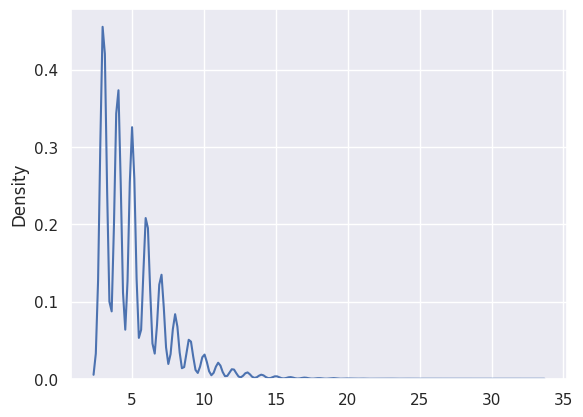

In [237]:
# myout.scoreLen
sns.set(style="darkgrid")
fig = sns.kdeplot(myout.scoreLen, fill=False, color="b")

### kmer size 75_new

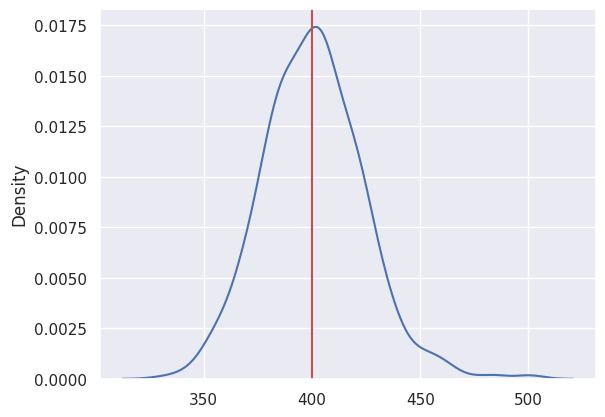

In [238]:
all_length_75_new = []
for i in range(len(myout.reads)):
    mykmer = myout.reads[i]['kmer']
    myscore = myout.reads[i]['scores']
#     print(mykmer)
#     print(len(mykmer))
#     print(myscore[:5])
#     print(len(myscore))
    all_length_75_new.append(len(myscore))
    
sns.set(style="darkgrid")
fig = sns.kdeplot(all_length_75_new, fill=False, color="b")
fig.axvline(400, 0, 2, color="r")
# fig = sns.kdeplot(predictions, fill=False, color="r")

In [214]:
len(all_length_75_new)

736

In [233]:
all_length_75_new.sort()
all_length_75_new[730:]

[454, 472, 477, 485, 492, 502]

In [234]:
all_length_75_new_sd = []
for i in all_length_75_new:
    all_length_75_new_sd.append(i-400)

all_length_45_sd

[-62,
 27,
 -60,
 -24,
 -32,
 2,
 65,
 -29,
 -11,
 0,
 9,
 118,
 -70,
 18,
 409,
 -123,
 -40,
 -63,
 -75,
 -61,
 -82,
 -71,
 87,
 115,
 -56,
 -91,
 -61,
 9,
 -66,
 -5,
 -34,
 66,
 -40,
 82,
 253,
 80,
 -88,
 -36,
 -13,
 -38,
 -66,
 48,
 30,
 50,
 21,
 15,
 -94,
 52,
 59,
 -70,
 336,
 36,
 -40,
 -87,
 84,
 77,
 4,
 -58,
 351,
 -46,
 -30,
 9,
 -68,
 -66,
 27,
 -24,
 16,
 -52,
 175,
 68,
 -75,
 46,
 -29,
 31,
 112,
 119,
 -15,
 15,
 -63,
 9,
 -11,
 -66,
 1,
 -28,
 -60,
 -50,
 35,
 -33,
 60,
 -56,
 -66,
 41,
 105,
 40,
 -20,
 -35,
 20,
 -16,
 0,
 19,
 690,
 162,
 155,
 21,
 93,
 351,
 220,
 263,
 217,
 50,
 -5,
 23,
 40,
 18,
 9,
 80,
 -55,
 -94,
 -58,
 -17,
 -101,
 -50,
 -27,
 -83,
 12,
 56,
 -24,
 6,
 -30,
 51,
 64,
 111,
 50,
 47,
 131,
 79,
 78,
 21,
 79,
 -16,
 -7,
 -20,
 48,
 39,
 90,
 81,
 35,
 -13,
 80,
 -101,
 -47,
 -24,
 -32,
 -73,
 26,
 -101,
 23,
 127,
 -37,
 -88,
 -38,
 -59,
 -4,
 -25,
 33,
 24,
 113,
 129,
 44,
 -1,
 31,
 -47,
 -2,
 -8,
 265,
 3,
 -14,
 -31,
 -2,
 -1,
 -115,


### kmer size 75

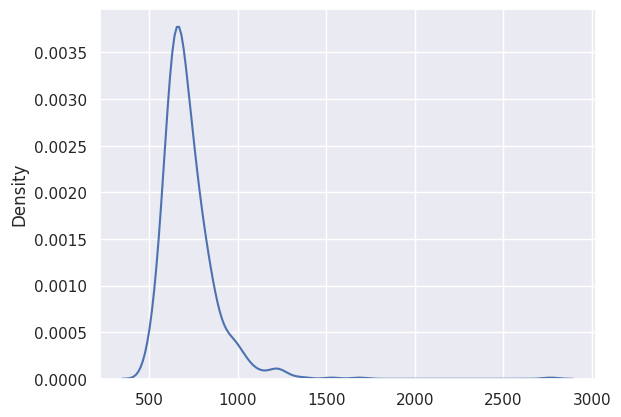

In [156]:
all_length_75 = []
for i in range(len(myout.reads)):
    mykmer = myout.reads[i]['kmer']
    myscore = myout.reads[i]['scores']
#     print(mykmer)
#     print(len(mykmer))
#     print(myscore[:5])
#     print(len(myscore))
    all_length_75.append(len(myscore))
    
sns.set(style="darkgrid")
fig = sns.kdeplot(all_length_75, fill=False, color="b")
# fig = sns.kdeplot(predictions, fill=False, color="r")

### kmer size 74

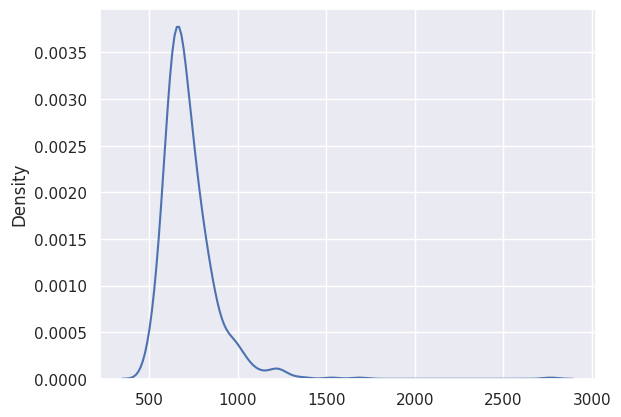

In [158]:
all_length_74 = []
for i in range(len(myout.reads)):
    mykmer = myout.reads[i]['kmer']
    myscore = myout.reads[i]['scores']
#     print(mykmer)
#     print(len(mykmer))
#     print(myscore[:5])
#     print(len(myscore))
    all_length_74.append(len(myscore))

sns.set(style="darkgrid")
fig = sns.kdeplot(all_length_74, fill=False, color="b")
# fig = sns.kdeplot(predictions, fill=False, color="r")

### kmer size 73

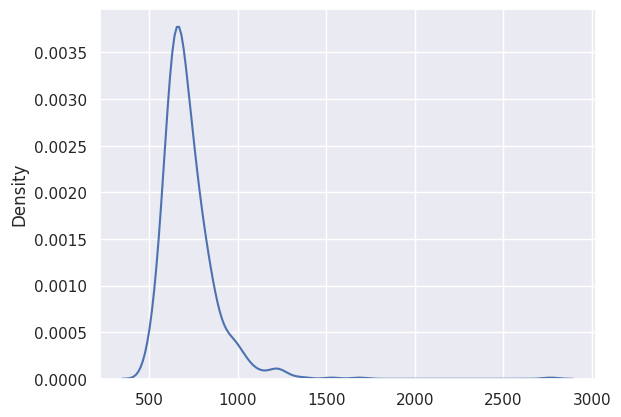

In [160]:
all_length_73 = []
for i in range(len(myout.reads)):
    mykmer = myout.reads[i]['kmer']
    myscore = myout.reads[i]['scores']
#     print(len(mykmer))
#     print(myscore[:5])
#     print(len(myscore))
    all_length_73.append(len(myscore))
    
sns.set(style="darkgrid")
fig = sns.kdeplot(all_length_73, fill=False, color="b")
# fig = sns.kdeplot(predictions, fill=False, color="r")

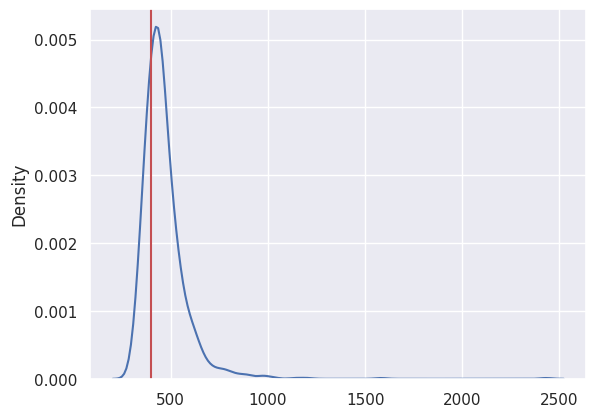

In [171]:
# all_length_50 = []
# for i in range(len(myout.reads)):
#     mykmer = myout.reads[i]['kmer']
#     myscore = myout.reads[i]['scores']
# #     print(mykmer)
# #     print(len(mykmer))
# #     print(myscore[:5])
# #     print(len(myscore))
#     all_length_50.append(len(myscore))
    
sns.set(style="darkgrid")
fig = sns.kdeplot(all_length_50, fill=False, color="b")
fig.axvline(400, 0, 2, color="r")
# fig = sns.kdeplot(predictions, fill=False, color="r")

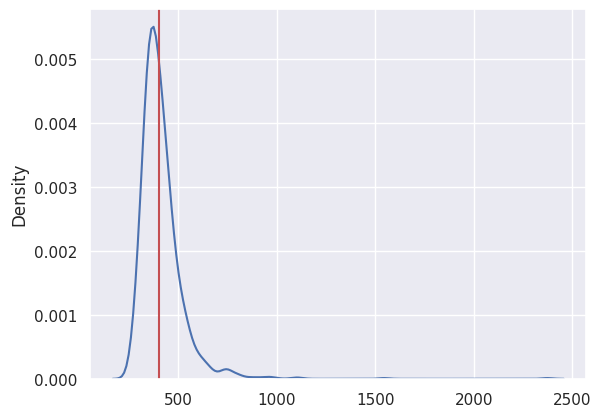

In [170]:
all_length_45 = []
for i in range(len(myout.reads)):
    mykmer = myout.reads[i]['kmer']
    myscore = myout.reads[i]['scores']
#     print(mykmer)
#     print(len(mykmer))
#     print(myscore[:5])
#     print(len(myscore))
    all_length_45.append(len(myscore))
    
sns.set(style="darkgrid")
fig = sns.kdeplot(all_length_45, fill=False, color="b")
fig.axvline(400, 0, 2, color="r")
# fig = sns.kdeplot(predictions, fill=False, color="r")